In [ ]:
import librosa
import numpy as np
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchaudio
import os, os.path, glob

import IPython.display as ipd
import librosa.display
from chatspace import ChatSpace
import pymysql
import re

In [2]:
def classific(text):
    if text.endswith('니다'):
        return text
    elif text.endswith('요'):
        return text
    elif text.endswith('죠'):
        return text 
    elif text.endswith('까'):
        return text
    elif text.endswith('이다'):
        return text
    elif text.endswith('었다'):
        return text
    elif text.endswith('한다'):
        return text
    elif text.endswith('았다'):
        return text
    elif text.endswith('혔다'):
        return text
    elif text.endswith('됐다'):
        return text
    elif text.endswith('졌다'):
        return text
    elif text.endswith('된다'):
        return text
    elif text.endswith('였다'):
        return text
    elif text.endswith('하다'):
        return text
    elif text.endswith('왔다'):
        return text
    elif text.endswith('인다'):
        return text
    elif text.endswith('진다'):
        return text
    elif text.endswith('냈다'):
        return text
    elif text.endswith('났다'):
        return text
    else:  
        return 'NaN'

In [3]:
stdir = '/data/match_vod'
audio_dir = glob.glob('%s/*.flac'%stdir)
audio_dir.sort()
text_dir = glob.glob('%s/*.ctm'%stdir)
conn = pymysql.connect(host='192.168.0.211', user='gyu', password='1234', db='match_up')
curs=conn.cursor()
spacer = ChatSpace()

Loading JIT Compiled ChatSpace Model


In [ ]:
for o,i in enumerate(audio_dir):
    # 음원파일 로드 
    y, sr = librosa.load(i, sr = 16000)
    #  ctm 파일 로드
    fname = os.path.basename(i)
    name = re.sub('.flac','',fname)
    name = re.sub('conv_','',name)
    df = pd.read_csv('%s/%s.ctm'%(stdir, name), encoding='utf-8', header=None)
    df['sec'] = df[0].apply(lambda x : x.split(' ')[2])
    df['plus'] = df[0].apply(lambda x : x.split(' ')[3])
    df['plus'] = df['plus'].astype(float)
    df['sec'] = df['sec'].astype(float)
    df['time'] = df['sec']+df['plus']
    df['text'] = df[0].apply(lambda x : x.split(' ')[4])
    df['texts'] = df['text'].apply(lambda x : classific(x))
    df['index'] = df['text']
    for j,i in enumerate(df['texts']):
        if i =='NaN':
            df['index'].iloc[j] = int(df['sec'].iloc[j] * 16000)
        else:
            df['index'].iloc[j] = int(df['time'].iloc[j]* 16000)
    df_index=df[['time','index','text','sec']].drop(df.loc[df['texts']=='NaN'].index)
    
    for j,k in enumerate (df_index.index):
        if j+1 == df_index.shape[0]:
            pass
        else:
            if j == 0:
                first=int(df['index'].iloc[0])
                end = int(df_index['index'].iloc[0])
                s=0
                e=df_index.index[0]
                # 음원
                data = y[first:end]
                sf.write('%s_1.flac'%name, data, samplerate=sr, format='flac')
#                 audio = np.ndarray.dumps(data)
                # 텍스트
                tmp = df['text'].iloc[s+1:e+1]
                words = []
                for word in tmp:
                    words.append(word)
                tmp_2 = ''.join(words)
                text=spacer.space(tmp_2)
                uid = name
                duration_order= 1
                split_au_dir= '/data/match_vod/split_audio/%s_1.flac'%name
                time = float(df_index['sec'].iloc[0])
                sql = 'INSERT INTO ctm_dir(uid,duration_order, times, texts, split_au_dir,au_s_index, au_e_index) VALUES(%s,%s,%s,%s,%s, %s, %s)'
                val = [uid, duration_order,time, text,split_au_dir, first, end]
                curs.execute(sql, val)
                conn.commit()
            else:
                first=int(df_index['index'].iloc[j-1])
                end = int(df['index'].iloc[k])
                print(first, end)
                s=df_index.index[j-1]
                e=df_index.index[j]
                # 음원
                data = y[first:end]
                sf.write('%s_%s.flac'%(name,j+1), data, samplerate=sr, format='flac')
#                 audio = np.ndarray.dumps(data)
                # 텍스트
                tmp = df['text'].iloc[s+1:e+1]
                words = []
                for word in tmp:
                    words.append(word)
                tmp_2 = ''.join(words)
                text=spacer.space(tmp_2)
                uid = name
                duration_order = j+1
                split_au_dir= '/data/match_vod/split_audio/%s_%s.flac'%(name, j+1)
                time = float(df_index['sec'].iloc[j])
                sql = 'INSERT INTO ctm_dir(uid,duration_order, times, texts, split_au_dir,au_s_index, au_e_index) VALUES(%s,%s,%s,%s,%s, %s, %s)'
                val = [uid, duration_order,time, text,split_au_dir, first, end]
                curs.execute(sql, val)
                conn.commit()

/home/user/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


428640 460320
460320 543840
543840 766080
766080 903359
903359 1051200
1051200 1250879
1250879 1416480
1416480 1684320
1684320 1795680
1795680 1985760
1985760 2232480
2232480 2334720
2334720 2382240
2382240 2551680
2551680 2836319
2836319 2964480
2964480 3060959
3060959 3176160
3176160 3387839
3387839 3609600
3609600 3789600
3789600 3925920
3925920 4474560
4474560 4553760
4553760 4994880
4994880 5136000
5136000 5271840
5271840 5336160
5336160 5342400
5342400 5473440
5473440 5980320
5980320 6163200
6163200 6405120
6405120 6514559
6514559 6611040
6611040 6738720
6738720 6972000
6972000 7060800
7060800 7283040
7283040 7362719
7362719 7393920
7393920 7633440
7633440 7716000
7716000 8096160
8096160 8404320
8404320 8470080
8470080 8666400
8666400 8836800
8836800 8980320
8980320 9136320
9136320 9444960
9444960 9592320
9592320 9759360
9759360 10032000
10032000 10171200
10171200 10300800
10300800 10414080
10414080 10830240
10830240 11201280
11201280 11639520
11639520 11817599
11817599 12099840


In [13]:
data = y[25512480:25537440]
a=ipd.Audio(data, rate=sr)
a

In [6]:
df_index

,time,index,text,sec
9,26.79,428640,안녕하세요,26.13
14,28.77,460320,입니다,28.41
22,33.99,543840,하겠습니다,33.42
46,47.88,766080,하겠습니다,47.31
54,56.46,903359,볼까요,55.98
72,65.70,1051200,하죠,65.37
102,78.18,1250879,고요,77.88
134,88.53,1416480,이다,88.23
168,105.27,1684320,있습니다,104.85
179,112.23,1795680,읍니다,111.87


In [25]:
au = np.loads(feature)
au

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: np.loads is deprecated, use pickle.loads instead
  """Entry point for launching an IPython kernel.


array([0.        , 0.        , 0.        , ..., 0.02694702, 0.03198242,
       0.03619385], dtype=float32)

[0.         0.         0.         ... 0.02694702 0.03198242 0.03619385]


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.loads is deprecated, use pickle.loads instead
  # Remove the CWD from sys.path while we load stuff.


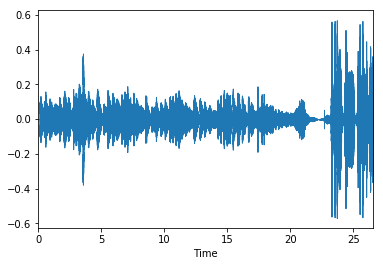

In [44]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize= (14,5))
%matplotlib inline

for i in a:
    au = np.loads(i[0])
    print(au)
    librosa.display.waveplot(au, sr=sr)
    break